**Objective**  
Here I present useful python snippets to use for statistical calculations. 
I also add the relevant equations and sometime relevant examples to explain usage.  
The content is aimed for the advanced practitioner that needs a quick reminder.  


<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Combinatorics

## Permutations 
When order matters

An ordered arrangement of $k$ objects from a set of $n$

$$
_nP_k=\frac{n!}{(n-k)!}
$$

In [54]:
from math import factorial

def simplistic_factorial(n):
    assert isinstance(n, int)
    
    if n == 0:
        return 1
    
    factor = simplistic_factorial(n-1)
    
    return factor * n
    
k = 20

print(factorial(k))
print(simplistic_factorial(k))

2432902008176640000
2432902008176640000


In [9]:
n = 6
k = 2

int(factorial(n)/factorial(n - k))

30

In [3]:
from itertools import permutations 


# All permutations of [1, 2, 3] 
print(list(permutations([1, 2, 3])))

# All permutations of pairs consisting of [1, 2, 3] 
print(list(permutations([1, 2, 3], 2)))

# All permutations of pairs consisting of [1, 1, 3] 
print(list(permutations([1, 1, 3], 2)))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]
[(1, 2), (1, 3), (2, 1), (2, 3), (3, 1), (3, 2)]
[(1, 1), (1, 3), (1, 1), (1, 3), (3, 1), (3, 1)]


## Combinations
When order does not matter

An unordered arrangement of $k$ objects from a set of $n$
$$
_nC_k=\frac{n!}{(n-k)!k!}\equiv {n \choose k}
$$

In [4]:
from scipy.special import comb

In [5]:
n = 6
k = 2

print(int(factorial(n)/factorial(k)/factorial(n-k)))
print(int(comb(n, k, repetition=False)))

15
15


In [6]:
from itertools import combinations 

# All combinations of pairs consisting of [1, 2, 3] 
print(list(combinations([1, 2, 3], 2)))
# All combinations of pairs consisting of [1, 1, 3] 
print(list(combinations([1, 1, 3], 2)))

[(1, 2), (1, 3), (2, 3)]
[(1, 1), (1, 3), (1, 3)]


# Discrete Random Variables

## Variance

For descrete variables
$$
\text{Var}(X) = \text{E}[(X-\text{E}[X])^2] = \text{E}[X^2] - \text{E}[X]^2
$$

## Standard Deviation 
A measure of the amount of variation or dispersion of a set of values.  
**Population Standard Deviation**
$$
S = \sqrt{ \frac{\sum_i^N \left(X_i-\bar{X} \right)^2}{N}}
$$
**Sample Standard Deviation** (Estimator)   
The following is the unbiased estimator if the variance exists and the sample values are drawn independently **with replacement**. There are $N-1$ degrees of freedom (because of the dependence on $\bar{X}$). 
$$
S = \sqrt{ \frac{\sum_i^N \left(X_i-\bar{X} \right)^2}{N-1}}
$$
$S^2$ is the unbiased estimator of the **population variance**, though $S$ is still a biased estimator for the **population standard deviation**.  

In [265]:
from statistics import mean

xs = [10.0, 9.8, 8.0, 7.8, 7.7, 7.0, 6.0, 5.0, 4.0, 2.0]

# --- Mean ---
mean_ = sum(xs)/len(xs)

print(f'mean: {mean_}, {mean(xs)}')

mean: 6.730000000000001, 6.73


In [273]:
from statistics import mean, pvariance

xs = [10.0, 9.8, 8.0, 7.8, 7.7, 7.0, 6.0, 5.0, 4.0, 2.0]

def sum_squares(l):
    mean_ = mean(l)
    return sum([(l[idx] - mean_)**2 for idx in range(len(l))])

def simple_pvariance(l):
    dof = len(l)
        
    return sum_squares(l)/dof

print(f'population variance: {simple_pvariance(xs)}, {pvariance(xs)}')

population variance: 5.724100000000002, 5.724100000000001


In [276]:
from statistics import mean, variance, stdev

def simple_variance(l):
    dof = len(l) - 1
    return sum_squares(l)/dof

print(f'sample variance: {simple_variance(xs)}, {variance(xs)}')
print(f'sample standard deviation: {simple_variance(xs)**0.5}, {stdev(xs)}')

sample variance: 6.360111111111113, 6.360111111111111
sample standard deviation: 2.5219260716981995, 2.5219260716981995


## Covariance
A measure of how two random variables change together, or the strength of their correlation.

$$
\text{cov}(X,Y) = \text{E}\left[ \left(X - \text{E}[X] \right)\left(Y - \text{E}[Y] \right) \right]  =  \text{E}[XY] - \text{E}[X]\text{E}[Y] =\\ 
\frac{1}{N}\sum_{i=1}^N\left(X_i - \bar{X}\right)\left(Y_i - \bar{Y}\right)
$$

## Pearson Correlation Coefficient

$$
\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X\sigma_Y}
$$

In [294]:
from statistics import mean, pvariance
from scipy.stats import pearsonr

xs = [10.0, 9.8, 8.0, 7.8, 7.7, 7.0, 6.0, 5.0, 4.0, 2.0]
ys = [200.0, 44.0, 32.0, 24.0, 22.0, 17.0, 15.0, 12.0, 8.0, 4.0]

mean_x = mean(xs)
mean_y = mean(ys)

cov_xy = sum([(xs[idx] - mean_x) * (ys[idx] - mean_y) for idx in range(len(xs))]) / len(xs)
std_x = pvariance(xs) ** 0.5
std_y = pvariance(ys) ** 0.5


pearsonr_ = cov_xy / std_x/ std_y

print(f'Pearson R: {pearsonr_},  {pearsonr(xs, ys)[0]}')

Pearson R: 0.612472193720848,  0.6124721937208482


## Spearman's Rank Correlation Coefficient


Special case where $X$ and $Y$  don't contain duplicates
$$
\rho_s = 1 - \frac{6 \sum_{i=1}^N d_i^2}{n(n^2-1)}
$$

$d_i=\text{Rank}(X_i) - \text{Rank}(Y_i)$ 

In [371]:
from scipy.stats import spearmanr

xs = [10, 9.8, 8, 7.8, 7.7, 1.7, 6, 5, 1.4, 2]
ys = [200, 44, 32, 24, 22, 17, 15, 12, 8, 4]

def rank_list(l):
    n = len(l)
    ranks = [None] * n
    indices = list(range(len(l)))
    indices.sort(key=lambda x: l[x])
    for rank, idx in enumerate(indices):
        ranks[idx] = rank + 1
        
    return ranks

def simple_spearman(xs, ys):
    xs_ranks = rank_list(xs)
    ys_ranks = rank_list(ys)

    n = len(xs)
    d2 = sum([(xs_ranks[idx] - ys_ranks[idx])**2 for idx in range(n)])

    return 1 - 6 * d2/n/(n**2-1)

print(f'Spearman R: {simple_spearman(xs, ys)}, {spearmanr(xs, ys)[0]}')

Spearman R: 0.9030303030303031, 0.9030303030303028


## Central Limit Theorem

If $X_1 , X_2 , ... , X_n$ is a random sample of size n taken from a population (either finite or infinite) with mean $\mu$ and finite variance $\sigma^2$ and if $\bar{X}$ is the sample mean, the limiting form of the distribution of 

$$
Z=\left({\frac {{\bar {X}}-\mu }{\sigma /\surd n}}\right)
$$ as n → ∞, is the standard normal distribution.

In [127]:
from math import sqrt

n = 100   # for n items
mu = 500  # with mean mu
sigma = 80 # and std sigma
z = 1.96

sigma_ = sigma/sqrt(n)
low_ = round(mu - z * sigma_,2)
high_ = round(mu + z * sigma_,2)

print(fr'for {n} items with mu={mu} and sigma={sigma}')
print(f'95% of the values are between {low_} and {high_} (using z*={z})')

for 100 items with mu=500 and sigma=80
95% of the values are between 484.32 and 515.68 (using z*=1.96)


In [143]:
from math import erf, sqrt

def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def cumulative_norm(x, mu=0, sigma=1):
    z = (x-mu)/sigma
    
    return phi(z)

n = 100   # for n items
mu = 50 # with mean mu
sigma = 10 # and std sigma
x = mu * n + sigma * sqrt(n)

mu_ = mu * n
sigma_ = sigma * sqrt(n)
prob = cumulative_norm(x, mu_, sigma_)

print(f'for {n} items with mu={mu} and sigma={sigma}')
print(f'there is a {prob*100:0.1f}% chance of having sum at value {x:0.1f}')

for 100 items with mu=50 and sigma=10
there is a 84.1% chance of having sum at value 5100.0


## Entropy 
(or Self Information for a Random Variable)  
A measure of uncertainty of events. 


Given a random variable $X$, with possible outcomes $x_{i}$, each with probability $p_{X}(x_{i})$, the entropy $H(X)$ of $X$ is  

$$
H(X) = - \sum_{x_i} p_X(x_i) \text{log}_b p_X(x_i)
$$

$b$ - base of logarithm

**Shannon Information Content / Self Information**  
The above is derived from the notion that $log_2(p)$ is the amount of information (in bits) a message is communicating. 


The number of bits to describe the probability of event $A$ happening is 
$$
log_2\left(\frac{1}{P(A)}\right)
$$

Another interpretation: how surprised should we be when seeing event $A$.  
E.g, large $P(A)$ we are lesss surprised, small $P(A)$ more surprised. 

 
* **Entropy** - the average amount of useful information. Or the expecation of the Shannon information content $H(x)=E\left[log\left(\frac{1}{p_X(x)}\right)\right]$.  
* **Cross Entropy** - the average length of a message. In ML commonly used as a cost function in classifiers.   
* **Kullback-Leibler Divergence** (also *relative entropy*, or *information divergence*) - the difference between cross-entropy and entropy

If the predictions are close to the truth, the cross entropy is similar to the entropy (low KL divergence).

If the predictions differ, then the cross-entropy will be greater in terms of bits (high KL divergence)

$$
\text{Cross Entropy} = \text{Entropy} + \text{KL Divergence}
$$


$$
D_{\text{KL}}\left(P||Q \right) = H(P,Q) - H(P) = - \sum p(x) \text{log} q(x) + \sum p(x) \text{log} p(x)= \sum p(x) log\left(\frac{p(x)}{q(x)} \right) = E_{X\sim p}\left[log\left(\frac{p(x)}{q(x)}\right)\right]
$$


Note that $D_{\text{KL}} \ge 0$ due to the fact that $H(P,Q) \ge H(P)$.  
In information theory $D_{\text{KL}}\left(P||Q \right)$ is the average penalty for storing a sample from $p$ using distribution $q$ instead of distribution $p$.  

**Uses of Information Divergence**
*  Information divergence will say how far a candidate model is from the observed data.
*  Bayesian Inference:  KL Divergence is a measure of the information gained when one revises one's beliefs from the prior probability distribution Q to the posterior probability distribution P. -- Or -- the amount of information lost when Q is used to approximate P. In applications, P typically represents the "true" distribution of data, observations or a precisely calculated theoretical distribution, while Q typically represents a theory, model, description, or approximation of P. In order to find a distribution Q that is closest to P, we can minimize KL divergence and compute an information projection. 



**Resources**  
* A Short Introduction to Entropy, Cross-Entropy and KL-Divergence / Aurélien Géron ([YouTube](https://www.youtube.com/watch?v=ErfnhcEV1O8))  
* Computational Probability and Inference (Week 4) ([edX/MIT](https://www.edx.org/course/computational-probability-and-inference))

In [1]:
# entropy

import numpy as np

#p = {'sun': 0.5, 'rain': 0.5}    # entropy: 1
p = {'sun': 0.75, 'rain': 0.25}   # entropy: 0.811
#p = {'sun': 0.99, 'rain': 0.01}  # entropy: 0.81

station_notice = 'sun'
print(f'{p} means that\na {station_notice} notice reduces the outcome uncertainty by {np.round(1./p[station_notice],3)} and hence {np.round(-np.log(p[station_notice])/np.log(2),3)} bit(s) of information')
station_notice = 'rain'
print(f'a {station_notice} notice reduces the outcome uncertainty by {np.round(1./p[station_notice],3)} and hence {np.round(-np.log(p[station_notice])/np.log(2),3)} bit(s) of information')


h = 0
for station_notice in p.keys():
    h -= p[station_notice] * np.log(p[station_notice])
h /= np.log(2)
print(f'yielding an average message of length {np.round(h,3)} bit(s)')

{'sun': 0.75, 'rain': 0.25} means that
a sun notice reduces the outcome uncertainty by 1.333 and hence 0.415 bit(s) of information
a rain notice reduces the outcome uncertainty by 4.0 and hence 2.0 bit(s) of information
yielding an average message of length 0.811 bit(s)


In [2]:
from scipy.stats import entropy
import numpy as np

# fair coin
pxs = [0.5, 0.5]  # 50% tails, 50% heads

h = 0
for px in pxs:
    h -= px * np.log(px)

print('In base e')
print(h)
print(entropy(pxs))

print('In Shannons (base 2)')
print(h/np.log(2))
print(entropy(pxs, base=2))

In base e
0.6931471805599453
0.6931471805599453
In Shannons (base 2)
1.0
1.0


In [3]:
# fair die (higher entropy than fair coin!)
pxs = [1./6] * 6

print(entropy(pxs, base=2)) # Shannons

2.584962500721156


true      distribution: [0.35, 0.35, 0.1, 0.1, 0.04, 0.04, 0.01, 0.01]
predicted distribution [0.25, 0.25, 0.125, 0.125, 0.0625, 0.0625, 0.03125, 0.03125]
entropy: 2.229
cross-entropy (naive):       3.0  (kl=0.771 bits)
cross-entropy (modified):       2.42  (kl=0.191 bits)
cross-entropy (true):       2.229


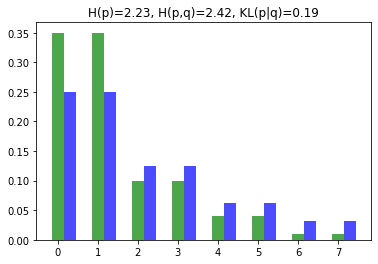

In [4]:
# cross entropy and KL-divergence
import matplotlib.pyplot as plt

p_uniform = [1/8. for i in range(8)]
p_non_uniform = [35./100, 35./100, 0.1, 0.1, 0.04, 0.04, 0.01, 0.01]
p_non_uniform_reverse = p_non_uniform[::-1]

# --- true distribution --
ps = p_uniform
ps = p_non_uniform
#ps = p_non_uniform_reverse

h = entropy(ps, base=2)

bits_per_event = [-np.log(p)/np.log(2) for p in ps]

# --- predicted distribution --
bits_per_event_predicted = [2, 2, 3, 3, 4, 4, 5, 5]
q_predicted_distribution = [1./2**(event_bits) for event_bits in bits_per_event_predicted]

print(f'true      distribution: {ps}')
print(f'predicted distribution {q_predicted_distribution}')

cross_entropy, cross_entropy_incorrect, cross_entropy_modified = 0, 0,0 
for p, event_bits, event_bits_predicted in zip(ps, bits_per_event, bits_per_event_predicted):
    cross_entropy += p * event_bits
    cross_entropy_incorrect += p * 3.
    cross_entropy_modified += p * event_bits_predicted
    
kl_incorrect = cross_entropy_incorrect - h
kl_modified = cross_entropy_modified - h
    
print(f'entropy: {np.round(h,3)}\ncross-entropy (naive): \
      {np.round(cross_entropy_incorrect,3)}  (kl={np.round(kl_incorrect,3)} bits)\ncross-entropy (modified): \
      {np.round(cross_entropy_modified,3)}  (kl={np.round(kl_modified,3)} bits)\ncross-entropy (true): \
      {np.round(cross_entropy,3)}') 


xs = np.arange(len(ps))

width = 0.3
plt.bar(xs, ps, color='green', alpha=0.7, width=width)
plt.bar(xs + width, q_predicted_distribution, color='blue', alpha=0.7, width=width)
plt.title(f'H(p)={np.round(h,2)}, H(p,q)={np.round(cross_entropy_modified,2)}, KL(p|q)={np.round(kl_modified,2)}')
pass

**Mutual Information**   
For two discrete random variables  $𝑋$  and  $𝑌$ , the mutual information between  $𝑋$  and  $𝑌$ , denoted as  $𝐼(𝑋;𝑌)$ , measures how much information they share.  

$$
I(X;Y) \equiv D_{\text{KL}}(p_{X,Y}||p_Xp_Y) = \sum_x\sum_y p_{X,Y}(x,y) log_2\left(\frac{p_{X,Y}(x,y)}{p_X(x)p_Y(y)} \right)
$$

The mutual information could be thought of as how far  $𝑋$  and  $𝑌$  are from being independent.  

* $I(X;Y)=0$: when $X$ and $Y$ are independent.  
* $I(X;Y)=H(X)$: when $X$ and $Y$ are equal.  

**Usage**   
* Probabilistic models: mutual information helps figure out which random variables we should directly model pairwise interactions with.

**Useful Resources**
* [`sklearn.metrics.mutual_info_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mutual_info_score.html)
* [`stackoverflow.com/questions/20491028`](https://stackoverflow.com/questions/20491028/optimal-way-to-compute-pairwise-mutual-information-using-numpy)

In [40]:
# Mutual information is about comparing the joint distribution of 𝑋 and 𝑌 
# with what the joint distribution would be if 𝑋 and 𝑌 were actually independent.

import numpy as np
import pandas as pd
from IPython.display import display

def information_divergence(p, q):
    return np.sum(p * np.log2(p / q))

def mutual_information(joint_prob_XY, verbose=True):
    # marginal distributions
    prob_X = joint_prob_XY.sum(axis=1)
    prob_Y = joint_prob_XY.sum(axis=0)
    
    # joint distribution if X and Y were actually independent
    joint_prob_XY_indep = np.outer(prob_X, prob_Y)
    
    if len(joint_prob_XY.shape) != 2:
        verbose = False
    
    if verbose:
        print('joint probability')
        df_joint_prob_XY = pd.DataFrame(joint_prob_XY)
        df_joint_prob_XY.columns.name = 'Y'
        df_joint_prob_XY.index.name = 'X'
        display(df_joint_prob_XY)
        
        print('joint probability if independent')
        df_joint_prob_XY_indep = pd.DataFrame(joint_prob_XY_indep)
        df_joint_prob_XY_indep.columns.name = 'Y'
        df_joint_prob_XY_indep.index.name = 'X'
        display(df_joint_prob_XY_indep)
        
    return information_divergence(joint_prob_XY, joint_prob_XY_indep)
        
    
joint_prob_XY = np.array([[0.10, 0.09, 0.11], [0.08, 0.07, 0.07], [0.18, 0.13, 0.17]])

mutual_information(joint_prob_XY)

joint probability


Y,0,1,2
X,,,
0,0.10,0.09,0.11
1,0.08,0.07,0.07
2,0.18,0.13,0.17


joint probability if independent


Y,0,1,2
X,,,
0,0.1080,0.0870,0.105
1,0.0792,0.0638,0.077
2,0.1728,0.1392,0.168


0.0022610829960697087

# Probabilities

**Notation**  
* $X:\Omega \rightarrow \mathcal{X}$ means rand variable $X$ maps from sample space $\Omega$ to alphabet $\mathcal{X}$.  
* alphabet - the possible values that a r.v can take. $|\mathcal{X}|$ is the length of the alphabet.  
* $\mathbb{P}(X=x)$ probability that r.v $X$ is equal to value $x$.  
* $\{X=x\}$ is short for $\{\omega\in\Omega: X(\omega)=x\}$  
* $X\sim N(\mu,\sigma)$ means r.v $X$ is distributed like ... (in this example Normal distribution)
* $\exists$ - exists


## Probability Spaces and Events

**Outcome** - A result of an experiment. All possible outcomes comprise a set $\Omega$, where $\sum_{\omega \in \Omega} P(\omega)=1$

**Event** - a set of one or more experiment outcomes $\Omega$, i.e, a subset of $\Omega$.   
Example:  
An experiment of flipping two coins has four outcomes: $\Omega$=`{HH, HT, TH, TT}`.   
Example events are:  
* Occurences in which the second coin has tails: `A={HT, TT}`$\subset \Omega$  
* Occurences in which there is at least one heads: `B={HH, HT, TH}`
* Occurance in which both are heads `C={HH}`

Note: When you run an experiment, there can be only one outcome, but there can be multiple events.  E.g if the experiment yields outcome `HT`, events `A` and `B` have occured simultaneously.   

*Event compliment*  
$A^c = \forall \omega \notin A$  
$\phi \notin \Omega$ is the empty set.  
$A \cap C = \phi$ means there is no overlap (as in the example above).

Suggestion:  
It is better of thinking about probability of an event rather than an outcome. E.g, in the case of an event with one outcome $\omega$, it would be better to discuss $P(\{\omega\})$ than $P(\omega)$.  



$P(A)=\sum_{\omega \in A} P(\omega)$ - Marginal Probability of event $A$

$P(A) + P(A^c) = P(\Omega) \equiv 1$  
$P(\phi) = 0 $  

if $A \subset B$ then $P(A) \le P(B)$


## Events as r.v

Given $(\Omega, P)$   
r.v $X: \Omega \rightarrow \mathcal{X}$  

$\Omega$ - sample space  
$P$ - probability distribution  
$\mathcal{X}$ - alphabet: set of values of r.v that $X$ takes.   


E.g,  
$W(\omega)=$ `{sun, rain, snow}`  
$I(\omega) \begin{cases} 1 \ \ \text{if} \ \omega\in\{\text{sun} \}  \\ 0 \ \  \text{if} \ \omega\in\{\text{rain, snow}  \}  \end{cases}$  
We see:  
$W: \Omega \rightarrow \Omega$, or $\mathcal{W} = \Omega$  
$I: \Omega \rightarrow \{0, 1\}$, or $\mathcal{I} = \{0, 1 \}$ 

**Probability Mass Function** (pmf)    
Also called: probability table and probability distribution.  
From a r.v $X$ we define a probability $P_{X}=\mathbb{P}(X=x)$, where $x\in\mathcal{X}$  

$0\le P_X \le 1$  
$\sum_{x\in \mathcal{X}}P_X(x)= 1$


E.g,  
$P_{W}(w) = \mathbb{P}(W=w)$  
$P_{I}(i) = \mathbb{P}(I=i)$





In [19]:
import numpy as np

def sample_from_finite_probability_space(finite_prob_space):
    """
    Produces a random outcome from a given finite probability space.

    Input
    -----
    - finite_prob_space: finite probability space encoded as a
      dictionary

    Output
    ------
    - random outcome, which is one of the keys in the
      finite_probability_space dictionary's set of keys
      (remember: these keys form the sample space)
    """

    # first produce a list of pairs of the form (outcome, outcome probability)
    outcome_probability_pairs = list(finite_prob_space.items())

    # convert the pairs into two lists "outcomes" and "outcome_probabilities":
    # - outcomes: list of outcomes
    # - outcome_probabilities: i-th element is the probability of the i-th
    #   outcome in the "outcomes" list
    # (note that this step is needed because NumPy wants these lists
    # separately)
    outcomes, outcome_probabilities = zip(*outcome_probability_pairs)

    # use NumPy to randomly sample
    random_outcome = np.random.choice(outcomes, p=outcome_probabilities)
    return random_outcome

In [74]:
# Approach 1

prob_space = {'sunny': 1/2, 'rainy': 1/6, 'snowy': 1/3}

W_mapping = {'sunny': 'sunny', 'rainy': 'rainy', 'snowy': 'snowy'}
I_mapping = {'sunny': 1, 'rainy': 0, 'snowy': 0}


random_outcome = sample_from_finite_probability_space(prob_space)
random_outcome

W = W_mapping[random_outcome]
I = I_mapping[random_outcome]

print(f'outcome={random_outcome}, i.e,\nW={W}, I={I}')

outcome=sunny, i.e,
W=sunny, I=1


In [73]:
# Approach 2

W_table = {'sun': 0.5, 'rain': 1./6, 'snow': 1/3.}
I_table = {0: 0.5, 1: 0.5}

print(W_table, I_table)

W = sample_from_finite_probability_space(W_table)
I = sample_from_finite_probability_space(I_table)

print(f'W = {W}')
print(f'I={I}  (need not be same as W={W})')

{'sun': 0.5, 'rain': 0.16666666666666666, 'snow': 0.3333333333333333} {0: 0.5, 1: 0.5}
W = snow
I=0  (need not be same as W=snow)


## Relating Two Events

**Compound event**  
combination of 2 or more events  

$P(A|B)$ - Conditional Probability (of $A$ happening given $B$ occured)  

*Intersect of events* $A\cap B$  
$P(A\cap B)\equiv P(A, B)$ - Joint Probability of events $A$ and $B$ ( `and` rule - think Venn Diagram)     
$P(A\cap B) = P(A|B)P(B)$ - Chain rule (Product Rule)  
$$
 P(A|B) = \frac{P(A\cap B)}{P(B)}
$$

*Union of events*  $A\cup B$   
$P(A\cup B) = P(A) + P(B) - P(A\cap B)$  (`or` rule - think Venn Diagram)

**Event Relationships**  
$P(A|B) = P(A)$ - When $A$ is *independent* of $B$.  
$P(A \cup B) = P(A)+P(B)$ - When $A$ and $B$ are *disjoint* events ($P(A\cap B)=0$)    
$P(A \cup B)=1$ - When $A$ and $B$ are *mutually exhaustive*  

**Bayes' Theorem**  
(Bayes' Rule, Bayes' Law)  
$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)} = \frac{P(B|A)P(A)}{P(B|A)P(A) + P(B|A^c)P(A^c)}
$$

Model form:  
$$
P(\Theta|\text{data}) = \frac{P(\text{data}|\Theta)P(\Theta)}{P(\text{data})}
$$


$P(\Theta|\text{data})$ - posterior distribution of parameters $\Theta$ given `data` has been observed    
$P(\Theta)$ - prior distribution of parameters $\Theta$   
$P(\text{data}|\Theta)$ - the likelihood distribution $L(\text{data})$. 

In [104]:
# Approach 0: All values

prob_table = {('sunny', 'hot'): 3/10,
    ('sunny', 'cold'): 1/5,
    ('rainy', 'hot'): 1/30,
    ('rainy', 'cold'): 2/15,
    ('snowy', 'hot'): 0,
    ('snowy', 'cold'): 1/3}

w = 'sunny'
t = 'cold'
print(f'p(w={w},t={t})={prob_table[(w, t)]}')

p(w=sunny,t=cold)=0.2


In [105]:
# Approach 1: Joint distribution using dictionaries within a dictionary
import pandas as pd

def print_joint_prob_table_dict(dicts_in_dict):
    """
    Prints a joint probability table that is stored using the dictionaries
    within a dictionary representation.
    
    Input
    -----
    - dicts_in_dict: joint probability table stored as dictionaries within a
      dictionary
    """
    print(pd.DataFrame(dicts_in_dict).T)

prob_W_T_dict = {}
for w in {'sunny', 'rainy', 'snowy'}:
    prob_W_T_dict[w] = {}

prob_W_T_dict['sunny']['hot'] = 3/10
prob_W_T_dict['sunny']['cold'] = 1/5
prob_W_T_dict['rainy']['hot'] = 1/30
prob_W_T_dict['rainy']['cold'] = 2/15
prob_W_T_dict['snowy']['hot'] = 0
prob_W_T_dict['snowy']['cold'] = 1/3

print_joint_prob_table_dict(prob_W_T_dict)

print(f'\np(w={w},t={t})={prob_W_T_dict[w][t]}')

            hot      cold
rainy  0.033333  0.133333
snowy  0.000000  0.333333
sunny  0.300000  0.200000

p(w=sunny,t=cold)=0.2


In [110]:
# Approach 2: Joint distribution using 2D arrays

def print_joint_prob_table_array(array, row_labels, col_labels):
    """
    Prints a joint probability table that is stored using the 2D array
    representation.
    
    Input
    -----
    - array: 2D array for the joint probability table (doesn't have label info)
    - row_labels: list of labels; i-th label is for the i-th row in <array>
    - col_labels: list of labels; i-th label is for the i-th column in <array>
    """
    if len(array.shape) != 2:
        raise Exception("The array specified must be two-dimensional.")
    print(pd.DataFrame(array, row_labels, col_labels))
    
import numpy as np
prob_W_T_rows = ['sunny', 'rainy', 'snowy']
prob_W_T_cols = ['hot', 'cold']
prob_W_T_row_mapping = {label: index for index, label in enumerate(prob_W_T_rows)}
prob_W_T_col_mapping = {label: index for index, label in enumerate(prob_W_T_cols)}
prob_W_T_array = np.array([[3/10, 1/5], [1/30, 2/15], [0, 1/3]])

print(prob_W_T_array, '\n')

print_joint_prob_table_array(prob_W_T_array, prob_W_T_rows, prob_W_T_cols)

w = 'sunny'
t = 'cold'
print(f'\np(w={w},t={t})={prob_W_T_array[prob_W_T_row_mapping[w], prob_W_T_col_mapping[t]]}')

[[0.3        0.2       ]
 [0.03333333 0.13333333]
 [0.         0.33333333]] 

            hot      cold
sunny  0.300000  0.200000
rainy  0.033333  0.133333
snowy  0.000000  0.333333

p(w=sunny,t=cold)=0.2


**Marganlisation** 

For two r.vs $X,Y$ with joint probability $p_{X,Y}$  
$p_X(x)= \sum_yp_{X,Y}(x,y)$  - marginalising out $Y$   
$p_Y(y)= \sum_xp_{X,Y}(x,y)$ - marginalising out $X$  


For four r.vs $X,Y,Z,W$ with joint probability $p_{X,Y,Z,W}$  
$p_{X,Y}(x,y)= \sum_z\sum_w p_{X,Y,Z,W}(x,y,z,w)$  - marginalising out $Z$ and $W$

In general  

$p_{X_1 ... X_{k}}(x_1,...,x_{k})=\sum_{x_{k+1}}...\sum_{x_N} p_{X_1,...,X_k,X_{k+1},...,X_N}(x_1,...,x_k, x_{k+1}...,x_N)$

Useful anology: summing out rows or columns in a joint probability table.  


In [121]:
prob_T = pd.Series(prob_W_T_array.sum(axis=0), index=prob_W_T_col_mapping.keys())

prob_W = pd.Series(prob_W_T_array.sum(axis=1), index=prob_W_T_row_mapping.keys())


print(prob_T)

print(f'\n{prob_W}')

hot     0.333333
cold    0.666667
dtype: float64

sunny    0.500000
rainy    0.166667
snowy    0.333333
dtype: float64


**Conditioning on Events** 

Given $(\Omega, \mathbb{P})$ (space and probabilities) and event $A$ occurs, we now know $\omega \in A$.  
So:  
$\Omega \rightarrow A$ - Space is reduced  
$\mathbb{P} \rightarrow \mathbb{P}(\cdot|A)$  

For single element $\omega$:  
$\mathbb{P}(\omega|A) = \begin{cases} 0 \ \ \ \ \ \ \   w \notin A \\ \frac{\mathbb{P}(\omega)}{\mathbb{P}(A)}  \ \  w \in A \end{cases}$

$\sum_{\omega \in A} \mathbb{P}(\omega|A)=1$  

Conditional probability of *event* $B$ given event $A$:   
$\mathbb{P}(B|A) = \frac{\mathbb{P}(A \cap B)}{\mathbb{P}(A)}$   


Product rule for random variables (chain rule; this has $N!$ orderings)    
$
p_{X_1, ...,  X_N}(x_1,...,x_N) = p_{X_1}(x_1)p_{X_2}(x_2|x_1)p_{X_3}(x_3|x_1, x_2)...p_{X_N}(x_N|x_1...x_{N-1})
$  


Useful anology: taking a slice of a joint probability table and renormalizing so entries within that slice summed to 1.  


In [139]:
# Conditional probability

w = 'sunny'
t = 'cold'
print(f'p(w={w},t={t})={prob_W_T_array[prob_W_T_row_mapping[w], prob_W_T_col_mapping[t]]}')
print(f'p(w={w}|t={t})={prob_W_T_array[prob_W_T_row_mapping[w], prob_W_T_col_mapping[t]]/ prob_T[t]} (p(t={t})={np.round(prob_T[t],2)}')
print(f'p(t={t}|w={w})={prob_W_T_array[prob_W_T_row_mapping[w], prob_W_T_col_mapping[t]]/ prob_W[w]} (p(w={w})={np.round(prob_W[w],2)}')

p(w=sunny,t=cold)=0.2
p(w=sunny|t=cold)=0.3 (p(t=cold)=0.67
p(t=cold|w=sunny)=0.4 (p(w=sunny)=0.5


**Law of Total Probability**  
Useful when you don't have access to all event $A$ but rather to disjoint (partitioned) events $B_i$ that cover the full space.  

$\forall \ k \ne l \ B_k \cap B_l = \phi$   (partitioned events)  
$\cup_{i=1}^{n} B_i = \Omega$  (covers the full space)  

$$
\mathbb{P}(A) = \sum_{i=1}^{n}\mathbb{P}(A|B_i)
$$


**Bayes Rule/Theorem for Random Variables**   
Given observed $Y=y$:  
$$
p_{X|Y}(x|y) = \frac{p_X(x)p_{Y|X}(y|x)}{\sum_{x'} p_X(x')p_{Y|X}(y|x')}
$$


**Independence**   $X \perp \!\!\! \perp  Y$  

$\mathbb{P}(A\cap B) = \mathbb{P}(A)\mathbb{P}(B)$  
$\mathbb{P}(A|B) = \mathbb{P}(A)$  

In [1]:
100*0.8 + 75*0.2

95.0

In [259]:
# Testing for independence
import numpy as np

# W and I are dependent
prob_W_I = np.array([[1/2, 0], [0, 1/6], [0, 1/3]])

# W and I are independent
#prob_W_I = np.array([[1/4, 1/4], [1/12, 1/12], [1/6, 1/6]])

prob_W = prob_W_I.sum(axis=1)
prob_I = prob_W_I.sum(axis=0)

print('input\n',prob_W_I)
print('\np_W:', prob_W)
print('p_I:',prob_I)
prob_W_outer_prob_I = np.outer(prob_W, prob_I)
print('\noutput\n',prob_W_outer_prob_I)

print(f'\n input=output (i.e, X, Y independent)?: {np.allclose(prob_W_outer_prob_I, prob_W_I)}')

input
 [[0.5        0.        ]
 [0.         0.16666667]
 [0.         0.33333333]]

p_W: [0.5        0.16666667 0.33333333]
p_I: [0.5 0.5]

output
 [[0.25       0.25      ]
 [0.08333333 0.08333333]
 [0.16666667 0.16666667]]

 input=output (i.e, X, Y independent)?: False


The `np.outer` does the following:  

$$
\left( \begin{array}{cc}
p_W(\text{sunny}) \\
p_W(\text{rainy}) \\
p_W(\text{snowy}) 
\end{array} \right)
%
\left( \begin{array}{cc}
p_I(0) &
p_I(1) \\
\end{array} \right) = 
%
\left( \begin{array}{cc}
p_W(\text{sunny})p_I(0) & p_W(\text{sunny})p_I(1) \\
p_W(\text{rainy})p_I(0) & p_W(\text{rainy})p_I(1) \\
p_W(\text{snowy})p_I(0) & p_W(\text{snowy})p_I(1) \\
\end{array} \right)
$$



**Mutual vs Pairwise Independence**  
Mutual independence is also called *Marginal independence*.  
$X, Y, Z$ are mutually independent if      
$p_{X,Y,Z}(x,y,z)=p_X(x)p_Y(y)p_Z(z)$  
In words: knowing any r.v means we do not know anything about any other.  

Pariwise independence - a weaker form of indpendence   
$p_{X,Y}(x,y)=p_X(x)p_Y(y)$    (for any pair combination of the three)  
In words: knowing a pair of r.v means we do not know anything about the third.  

Example: XOR function  
$X,Y$ are independent r.v where $Z=X\oplus Y$

|$X$|$Y$|$Z$|
|------|------|------|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|  

We see   
$p_Z(z) =  \begin{cases} 0.5 \ \ z=0 \\ 0.5 \ \ z=1 \end{cases}$  
which equals $p_{Z|X}(z|x)$ and $p_{Z|Y}(z|y)$.   
Meaning 
* pairwise independence: $X \perp \!\!\! \perp  Y$, $X \perp \!\!\! \perp  Z$, $Z \perp \!\!\! \perp  Y$  
* not mutual indpendence! $p_{Z|X,Y}(z|x,y) \ne p_Z(z)$


**Conditional Independence**

$$p_{X,Y|Z}(x,y|z) = p_{X|Z}(x|z)p_{Y|Z}(y|z)$$

Conditional Independence does not lead to Marginal independence and vice versa.  

**Maximum A Posteriori (MAP) Estimation**   
When we want to report wthe most probable value $𝑥$ that $𝑋$ can take on given that we have observed $𝑌=𝑦$. In general there might be multiple values.    
$$
\hat{x} = \text{arg max}_x p_{X|Y}(x|y)
$$

In [161]:
# Bayes' Theorem for Random Variables: Medical Diagnosis

import pandas as pd
from IPython.display import display

pX = {'healthy': 0.999, 'infected': 0.001}
pY_givenX = {'healthy':{'+':0.01, '-':0.99}, 'infected':{'+': 0.99, '-':0.01}}

print('pY|X')
df = pd.DataFrame(pY_givenX)
df.index.name = 'Y'
df.columns.name = 'X'
display(df)

x_to_not = {'healthy': 'infected', 'infected': 'healthy'}
for x in pX.keys():
    x_not = x_to_not[x]
    for y in ['-', '+']:
        pX_givenY = pY_givenX[x][y] * pX[x] / (pY_givenX[x][y] * pX[x] + pY_givenX[x_not][y] * pX[x_not])
        print(f'p({y}|{x}) = {np.round(pX_givenY,5)}') 

pY|X


X,healthy,infected
Y,,
+,0.01,0.99
-,0.99,0.01


p(-|healthy) = 0.99999
p(+|healthy) = 0.90984
p(-|infected) = 1e-05
p(+|infected) = 0.09016


Sensitivity = $P(\text{tested +}| \text{is +})$ = TPR = Recall

Specificity = $P(\text{tested -}| \text{is -})$ = TNR

Prevelance = $P(\text{is +})$


$$P(\text{is +} |\text{tested +}) = 
\frac{P(\text{tested +}| \text{is +})P(\text{is +})}{P(\text{tested +}| \text{is +})P(\text{is +}) + P(\text{tested +}| \text{is -})P(\text{is -})}=\\
\frac{P(\text{tested +}| \text{is +})P(\text{is +})}{P(\text{tested +}| \text{is +})P(\text{is +}) + (1 - P(\text{tested -}| \text{is -})) (1 - P(\text{is +}))}=\\
\frac{\text{Sensitivity} \cdot \text{Prevelance}}{  \text{Sensitivity} \cdot \text{Prevelance} + (\text{1 - Specificity} )\cdot (\text{1 - Prevelance})}
$$ 

**Expectations**

The law of total expectation says that for a random variable $𝑋$  (with alphabet $\mathcal{X}$) and a partition $\mathcal{B}_1...\mathcal{B}_n$ of the sample space  
$$
\mathbb{E}[X] = \sum_{i=1}^n \mathbb{E}\left[X|\mathcal{B}i\right]\mathbb{P}(\mathcal{B}_i), \\
\text{, where} \\
\mathbb{E}\left[X|\mathcal{B}i\right] = \sum_{x\in\mathcal{X}} x p_{X|\mathcal{B}_i}(x) = \sum_{x\in\mathcal{X}} x \frac{\mathbb{P}(X=x_i, \mathcal{B}_i)}{\mathbb{P}(\mathcal{B}_i)}
$$

# Distributions

**Cumulative Probability**

The cumulative distribution function of real-valued random variable $X$ evaluated at $x$  is the probability that $X$ will take a value less than or equal to $x$:
$$
F_X(x) = P(X\le x)
$$

also
$$
P(a \le X\le b) = F_X(b)- F_X(a)
$$

## Bernouli/Binomial 

### Binomial Experiment
Also called Bernoulli trial

A statistical experiment that has the following properties:  
* The experiment consists of  repeated trials.
* The trials are independent.
* The outcome of each trial is either success ($s$) or failure ($f$).

### Binomial Distribution 
Also called Bernouli 

The probability distribution of $k$  successes in $n$ independent Bernoulli experiments, each with probability of success $p$. 

Probability mass function:
$$
b(k,n,p) = {n \choose k} p^k (1-p)^{(n-k)}
$$

It is often used to model the number successes in sample size ***with replacement*** from a population size $N$ (for without replacement see [Hypergeometric Distribution](#Hypergeometric-Distribution))

**Bernouli Distribution**  
Is a specific case of Binomial of $b(k,1,p)$ where $k=0,1$.

Probability mass function:
$$
b(k,1,p) = {1 \choose k} p^k (1-p)^{(1-k)}
$$

In [2]:
from scipy.special import comb

# probability of k successes in n trials
p = 0.5
n = 10
k = 5

comb(n, k) * (p**k) * ( (1-p)**(n-k))

0.24609375

In [7]:
# or one can use the Probability mass function: binom.pmf function

from scipy.stats import binom

binom.pmf(k, n, p)

0.24609375000000003

In [8]:
pp = 0  # probability of having k successes within ks of n trials

#ks = [5, 6, 7, 8, 9, 10]
ks = [0, 1, 2, 3, 4, 5]

for k in ks:
    pp += comb(n, k) * (p**k) * ( (1-p)**(n-k))
    
pp

0.623046875



### Geometric Distribution 
One of two descrete distributions:
* The probability distribution of the number $X$ of Bernoulli trials needed to get one success, supported on the set $k = \{1, 2, 3, ... \}$.

$$
Pr(X=k) = (1-p)^{k-1}p, \ \ \ \ \ \text{for} \ k=1,2,3...
$$

* The probability distribution of the number $Y = X − 1$ of failures before the first success, supported on the set $k = \{ 0, 1, 2, ... \}$
$$
Pr(Y=k) = (1-p)^kp, \ \ \ \ \ \text{for} \ k=0,1,2,...
$$



Which of these one calls "the" geometric distribution is a matter of convention and convenience.

In either case, the sequence of probabilities is a geometric sequence (i.e, $r^k$)

**Requirements**  
* The phenomenon being modeled is a sequence of independent trials.
* There are only two possible outcomes for each trial, often designated success or failure.
* The probability of success, $p$, is the same for every trial.


**Useful To Know**  
When applying to problems the following identity is useful for rates $r\in(-1,1)$
$$
\sum_{i=0}^{\infty}r^i=\frac{1}{1-r}
$$

**Related**    
Negative Binomial Experiment,  Negative Binomial Distribution


In [91]:
p = 1/2. # probability of giving birth to a girl

# probability of giving birth to a girl on the 4th try
k = 4  
print((1-p)**(k-1)*p)

# probability of having 3 boys before the first girl
k = 3
(1-p)**k * p

0.0625


0.0625

In [104]:
p = 1./3  # probability of failing an inspection

pp = 0    # What is the probability that the 1st defect is found during the first 5 inspections?

max_k = 5
for k in range(0, max_k):
    pp += (1-p)**k * p    

print(pp)

# better method (imagine max_k>1000)
pp_inv = (1-p)**max_k # probablity that passing inspection in all 5 inspections
print(1- pp_inv)


0.8683127572016461
0.868312757201646


### Hypergeometric Distribution

The probability of sampling ***without replacement*** $k$ successes in a sample of $n$ from a population of total $N$ and $K$ total successes.

Probability Mass Function:
$$
P(X=k) = \frac{ {K \choose k} { {N-K} \choose {n-k} } }{N \choose n}
$$

In [25]:
# Example: extracting balls from an urn, 
# where the balls are either green (success) or red. 
from scipy.special import comb
from scipy.stats import hypergeom

N=100  # total balls
K=60   # red balls
n=10   # choosing total 10 balls
k=4    # of which are red

print(comb(K,k) * comb(N-K, n-k) / comb(N,n))
print(hypergeom.pmf(k, N, K, n))

0.10812795900674416
0.1081279590067445


## Poisson Distribution
Popular for modeling the number of times an event occurs in an interval of time or space.

A discrete random variable $X$ is said to have a Poisson distribution with parameter $λ > 0$ (need not be integer), if, for $k = 0, 1, 2, ...,$ the probability mass function of $X$ is given by:  
$$
P(X=k) = \frac{\lambda^ke^{-\lambda}}{k!}
$$

$\lambda$ is both the mean and the variance of the distribution.  
$\lambda=E(X)=V(X)$ 

[scipy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html)

In [33]:
import numpy as np
from math import factorial
from scipy.stats import poisson 

lmbda = 10 # mean (and variance) of people entring a store in an hour
k = 5 

# probability that k people enter the store in an hour
print((lmbda ** k) * np.exp(-lmbda) / factorial(k))
print(poisson.pmf(k, lmbda))

0.03783327480207071
0.03783327480207079


In [34]:
lmbd_A = 0.88
#cost_A = 160 + 40*(X**2)
lmbd_B = 

2.718281828459045

## Normal Distribution
(or Gaussian or Gauss or Laplace–Gauss)

A type of continuous probability distribution for a real-valued random variable. The general form of its probability density function is:  

$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{- \frac{1}{2} \left(\frac{x-\mu}{\sigma}\right)^2}
$$

* $\mu$ mean (median and mode)
* $\sigma$ standard deviation ($\sigma^2$ is the distribution variance)

**Standard Normal Distribution**  
Case were $f(\mu=0, \sigma=1)$

$$
\phi(x) = \frac{1}{\sqrt{2\pi}} e^{- \frac{1}{2} x^2}
$$

Conversion  

$$
f(x) = \frac{1}{\sigma} \phi \left(\frac{x-\mu}{\sigma} \right)
$$


The Cumulative distribution function is

$$
\Phi(x) = \frac{1}{2} \left(1 + \text{erf}\left(\frac{x-\mu}{\sigma \sqrt{2}}\right)\right)
$$

$$
\text{erf}(z) = \frac{2}{\sqrt{\pi} }\int_{0}^{z} e^{-x^2} dx
$$

[math.erf](https://docs.python.org/3/library/math.html#math.erf)

In [69]:
from math import erf, sqrt

def phi(x):
    'Cumulative distribution function for the standard normal distribution'
    return (1.0 + erf(x / sqrt(2.0))) / 2.0

def cumulative_norm(x, mu=0, sigma=1):
    z = (x-mu)/sigma
    
    return phi(z)


cumulative_norm(19.5, 20, 2)

0.4012936743170763

In [83]:
def cumulative_difference(x2, x1, mu=0, sigma=1):
    return cumulative_norm(x2, mu, sigma) - cumulative_norm(x1, mu, sigma)

mu = 20
sigma = 10
nsigma = 2

cumulative_difference(mu + nsigma*sigma, mu - nsigma*sigma, mu, sigma)

0.9544997361036416

In [87]:
x = 9800
mu = 205
sigma = 15
n = 49

n*mu


10045

In [106]:
x = 250
mu = 2.4
sigma=2.
n = 100

mu_ = mu * n
sigma_ = sigma * sqrt(n)

print(mu_, sigma_)

round(cumulative_norm(x, mu_, sigma_),4)

240.0 20.0


0.6915

In [110]:
n = 100
mu = 500
sigma = 80
z = 1.96

sigma_ = sigma/sqrt(n)

print(round(mu - z * sigma_,2))
print(round(mu + z * sigma_,2))

484.32
515.68


In [109]:
mu_ + z * sigma_

51568.0

In [97]:
from math import sqrt

mu_ = n*mu
sigma_ = sigma*sqrt(n)

mu_, sigma_

round(cumulative_norm(x, mu_, sigma_),4)

0.0098

In [99]:
mu, sigma = 70, 10
x = 80

1. - cumulative_norm(x, mu, sigma)

0.15865525393145707

## Q-Q Plots
A graphical method for comparing two probability distributions by plotting their quantiles against each other.

E.g, a *Normal probability plot* (also called *normal plot*) is graphical technique to identify substantive departures from normality. This includes identifying outliers, skewness, kurtosis, a need for transformations, and mixtures. 

[scipy.stats.probplot](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html)

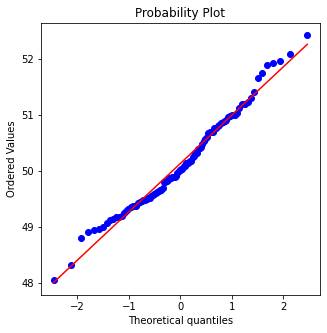

In [25]:
from scipy import stats
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
nsample = 100
#x = stats.t.rvs(3, size=nsample) # A t distribution with small degrees of freedom
#x = stats.t.rvs(25, size=nsample) # A t distribution with larger degrees of freedom
#x = stats.norm.rvs(loc=[0,5], scale=[1,1.5], size=(nsample//2,2)).ravel() # A mixture of two normal distributions with broadcasting
x = stats.norm.rvs(loc=50, scale=1, size=nsample) # A standard normal distribution

res = stats.probplot(x, plot=plt)

# Probability Graph Models

**Undirected Graphical Model**   
Also called: *Markov Random Field*.  
No sense of direction between nodes 
$$
G = (V,E) \\ 
p_{X_1...X_N}(x_1...x_n) = \frac{1}{Z}\prod_{i\in V}\phi_i(x_i)\prod_{(i,j)\in E}\psi_{i,j}(x_i,x_j)
$$

* (this is actually an undirected pairwise graphical model)
* $G(V,E)$ graph with nodes/vertices $V$ and edeges $E$ 
* $p_{X_1...X_N}(x_1...x_n)$ joint probability table of $G$.
* $\phi_i(x_i)$ singleton potential functions (marginal "probablity" of a node)
* $\psi_{i,j}(x_i,x_j)$ pairwise potential functions (joint "probability" of two nodes)
* potential functions need to be non-negative but need not sum to 1.
* $Z$ normalisation constant

# Resources

* Computational Probability and Inference course [(edX/MIT)](https://www.edx.org/course/computational-probability-and-inference)
* Blogs
    * [Count Bayesie](https://www.countbayesie.com/)
        * [Probability as logic using Python's data model](https://gist.github.com/willkurt/6c209c14bf777470543393302d1b523c)
    * Jonny Brooks-Bartlett's Towards Data Science ([page](https://towardsdatascience.com/@jonnybrooks04))